<a href="https://www.kaggle.com/code/hntrnnggia/segnet?scriptVersionId=229557195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [15]:
import os
import json
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
# Đường dẫn trên Kaggle
image_dir = "/kaggle/input/btxrd-v2/images"
json_dir = "/kaggle/input/btxrd-v2/annotations"  # Cập nhật đường dẫn JSON
mask_dir = "/kaggle/working/masks"  # Thư mục lưu mask
# Tạo thư mục mask nếu chưa có
os.makedirs(mask_dir, exist_ok=True)

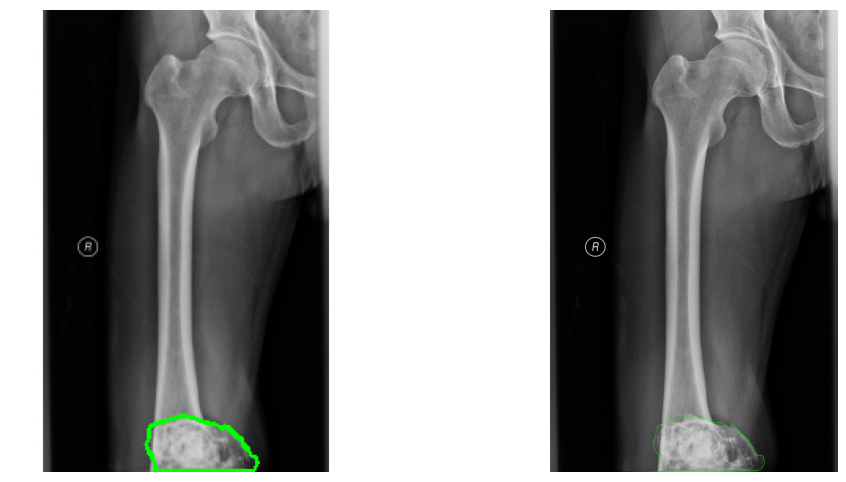

In [8]:
import json
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Danh sách đường dẫn JSON và ảnh
datasets = [
    {
        "json_path": "/kaggle/input/btxrd-v2/annotations/IMG000019.json",
        "image_dir": "/kaggle/input/btxrd-v2/images"
    },
    {
        "json_path": "/kaggle/input/btxrd-data/BTXRD/BTXRD/Annotations/IMG000019.json",
        "image_dir": "/kaggle/input/btxrd-data/BTXRD/BTXRD/images"
    }
]

# Danh sách ảnh đã xử lý
images = []

for dataset in datasets:
    # Đọc JSON
    with open(dataset["json_path"], "r") as f:
        data = json.load(f)

    # Lấy tên ảnh từ JSON
    image_filename = os.path.splitext(data["imagePath"])[0]  # "IMG000001"

    # Tạo đường dẫn ảnh
    image_path_jpg = os.path.join(dataset["image_dir"], image_filename + ".jpg")
    image_path_jpeg = os.path.join(dataset["image_dir"], image_filename + ".jpeg")

    # Kiểm tra xem ảnh nào tồn tại
    image_path = image_path_jpg if os.path.exists(image_path_jpg) else image_path_jpeg
    if not os.path.exists(image_path):
        print(f"LỖI: Không tìm thấy ảnh '{image_path_jpg}' hoặc '{image_path_jpeg}'")
        continue

    # Đọc ảnh
    image = cv2.imread(image_path)
    if image is None:
        print(f"LỖI: Không thể đọc ảnh '{image_path}'")
        continue

    # Đọc các vùng ung thư từ JSON và vẽ lên ảnh
    for shape in data["shapes"]:
        if shape["shape_type"] == "polygon":  # Nếu là đa giác
            points = np.array(shape["points"], dtype=np.int32)  # Chuyển tọa độ về numpy array
            cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)  # Vẽ đường viền xanh lá

    # Chuyển ảnh sang RGB để hiển thị với Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image_rgb)

# Hiển thị hai ảnh cạnh nhau
plt.figure(figsize=(12, 6))

for i, img in enumerate(images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.show()


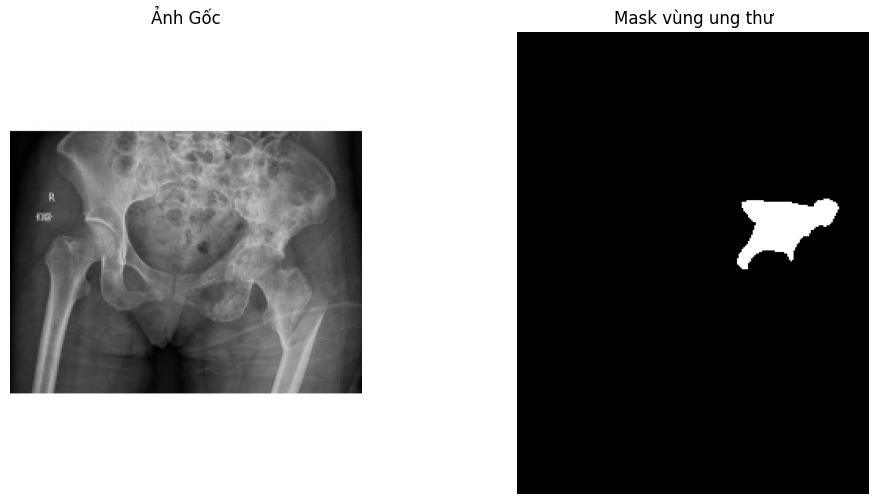

In [9]:
import json
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Đường dẫn JSON và ảnh
json_path = "/kaggle/input/btxrd-v2/annotations/IMG000001.json"
image_dir = "/kaggle/input/btxrd-v2/images"

# Đọc JSON
with open(json_path, "r") as f:
    data = json.load(f)

# Lấy tên ảnh từ JSON
image_filename = os.path.splitext(data["imagePath"])[0]  # "IMG000001"

# Tạo đường dẫn ảnh
image_path_jpg = os.path.join(image_dir, image_filename + ".jpg")
image_path_jpeg = os.path.join(image_dir, image_filename + ".jpeg")

# Kiểm tra xem ảnh nào tồn tại
image_path = image_path_jpg if os.path.exists(image_path_jpg) else image_path_jpeg
if not os.path.exists(image_path):
    print(f"LỖI: Không tìm thấy ảnh '{image_path_jpg}' hoặc '{image_path_jpeg}'")
    exit()

# Đọc ảnh để lấy kích thước
image = cv2.imread(image_path)
if image is None:
    print(f"LỖI: Không thể đọc ảnh '{image_path}'")
    exit()

height, width = image.shape[:2]

# Tạo ảnh mask (cùng kích thước với ảnh gốc, màu đen)
mask = np.zeros((height, width), dtype=np.uint8)

# Đọc các vùng ung thư từ JSON và vẽ lên mask
for shape in data["shapes"]:
    if shape["shape_type"] == "polygon":  # Nếu là đa giác
        points = np.array(shape["points"], dtype=np.int32)  # Chuyển tọa độ về numpy array
        cv2.fillPoly(mask, [points], color=255)  # Tô màu trắng cho vùng ung thư

# Hiển thị ảnh gốc và mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Ảnh Gốc")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("Mask vùng ung thư")

plt.show()
